patientunitstayid    135728
dtype: int64
{'Albumin': 44719, 'Bicarbonate': 10142, 'BUN': 2780, 'Calcium': 6347, 'FreeCalcium': 110656, 'Chloride': 3281, 'Magnesium': 54424, 'Phosphate': 86764, 'Hgb': 0, 'Sodium': 2513, 'Creatinine': 2492, 'Platelet': 5330, 'Potassium': 2480, 'Lactate': 86938, 'WBC': 3561, 'Glucose': 3242}


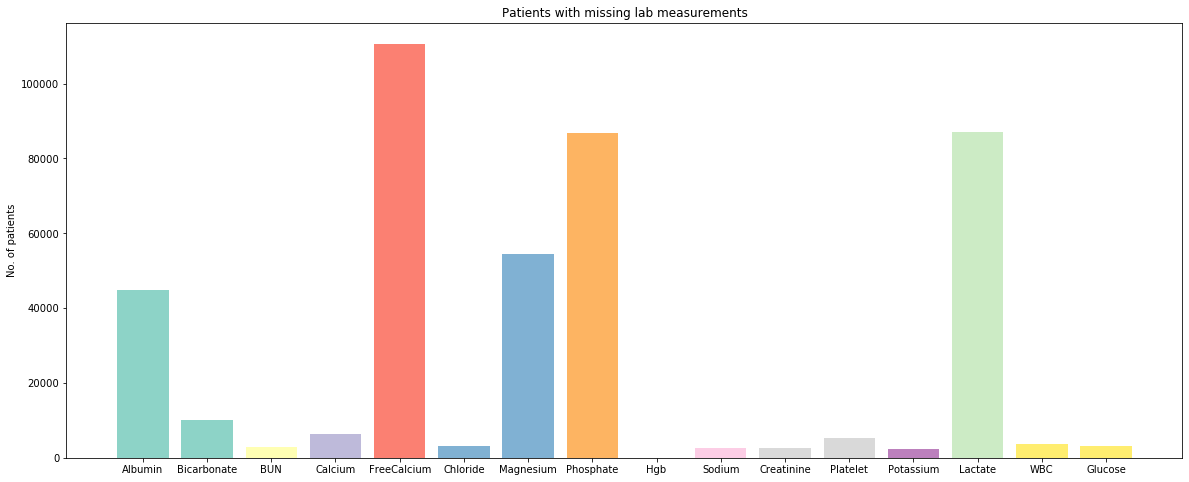

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("S:/NUS/Year Two/UROPS/eicu_labminmax.csv")
total_num = data[['patientunitstayid']].count()
print(total_num)
# creating column lables:

lab = data.columns.values[1:]

# get missing data: 

'''
OLD
lab_ranges = {"Albumin":[3.5,5.5], 
              "Bicarbonate": [22,32], 
              "BUN": [6, 20],
              "Calcium": [8.4, 10.3],
              "Chloride": [96, 108],
              "Creatinine": [0.4, 1.1],
              "Glucose": [70, 100],
              "Hemoglobin": [11.2, 15.7],
              "Lactate": [0.5, 2],
              "Magnesium": [1.6, 2.6],
              "Phosphate": [2.7, 4.5],
              "Potassium": [3.3, 5.1],
              "Sodium": [133, 145],
              "FreeCalcium": [1.1, 1.35]}  
ALL CAP NOT FRIENDLY TO EYES
lab_ranges = {'ALBUMIN':        [3.5, 5.5],                
              'BICARBONATE':    [21,29],                     
              'BUN':            [10,20],                                          
              'CALCIUM':        [8.5,10.5],                                       
              'FREECALCIUM':    [1.05,1.37],                  
              'CHLORIDE':       [98,106],                       
              'MAGNESIUM':      [1.8,3],                   
              'PHOSPHATE':      [3,4.5],                     
              'HEMOGLOBIN':     [12,18],                   
              'SODIUM':         [136,145],                
              'CREATININE':     [0.5,1.5],                   
              'PLATELET':       [150,400],                  
              'POTASSIUM':      [3.3,5.5],                 
              'LACTATE':        [0.5,2.0],                      
              'WBC':            [4.5,11],                     
              'GLUCOSE':        [75.0, 115.0]            
             } 
'''
lab_ranges = {'Albumin':        [3.5, 5.5],                
              'Bicarbonate':    [21,29],                     
              'BUN':            [10,20],                                          
              'Calcium':        [8.5,10.5],                                       
              'FreeCalcium':    [1.05,1.37],                  
              'Chloride':       [98,106],                       
              'Magnesium':      [1.8,3],                   
              'Phosphate':      [3,4.5],                     
              'Hgb':     [12,18],                   
              'Sodium':         [136,145],                
              'Creatinine':     [0.5,1.5],                   
              'Platelet':       [150,400],                  
              'Potassium':      [3.3,5.5],                 
              'Lactate':        [0.5,2.0],                      
              'WBC':            [4.5,11],                     
              'Glucose':        [75.0, 115.0]            
             } 

missing = dict((i, 0) for i in lab_ranges.keys())

for i in missing.keys():
    if  (i.lower() + "_max") in lab: 
        dropna_num = data[[i.lower() + '_max']].dropna().count()
        missing[i] = int(total_num) - int(dropna_num)
print(missing)


# plot missing data
"""
create a histal gram: x axis is the name of the lab tests, y axis is the count of missing values
total num is the same 38605 for every lab tests
use for loop to loop the different lab tests, get dropna_num and then subtract, 
store the differences (missing data) in the table/dataframe(with name of lab test as key and num of missing data as value)
plt.hist()
"""
plt.figure(figsize=(20,8))
color_list = plt.cm.Set3(np.linspace(0, 1, len(missing.keys())))
plt.bar(missing.keys(), missing.values(), color = color_list)
plt.title("Patients with missing lab measurements")
# plt.xticks(rotation='vertical')
plt.ylabel("No. of patients")
plt.savefig("eicu_figure/eicu_missing_data.png")
plt.show()

